In [ ]:
# Add relevant Jupyter notebook extensions 

In [ ]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

In [ ]:
# Import relevant modules

sub = Submarine()
# Instantiate your controller (depending on your implementation)
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("path/to/file") # You must implement this method in the Mission class

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

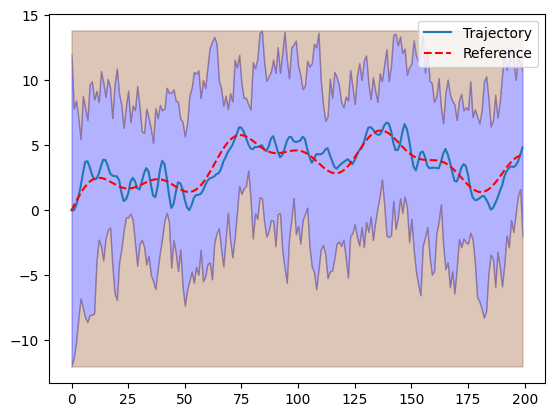

In [5]:
import sys
proj_root = r"c:\Users\willb\OneDrive\Documents\B1 MT W2\b1-coding-practical-mt24"
if proj_root not in sys.path:
    sys.path.insert(0, proj_root)

import numpy as np
import matplotlib.pyplot as plt

from uuv_mission.dynamic import Submarine, ClosedLoop, Mission

# try to import the controller module; if missing, define a simple PD controller here
try:
    from uuv_mission.control import PDController
except Exception:
    class PDController:
        def __init__(self, kp: float = 0.15, kd: float = 0.6):
            self.kp = float(kp)
            self.kd = float(kd)
            self.prev_error = None
        def reset(self):
            self.prev_error = None
        def __call__(self, reference: float, observation: float) -> float:
            e = float(reference) - float(observation)
            de = 0.0 if self.prev_error is None else (e - self.prev_error)
            u = self.kp * e + self.kd * de
            self.prev_error = e
            return u

# Controller gains (tune KP and KD as needed)
KP = 0.15
KD = 0.55
controller = PDController(kp=KP, kd=KD)

# Create a mission (or load from CSV)
# mission = Mission.from_csv(r"c:\path\to\mission.csv")  # uncomment and set path to use a CSV
mission = Mission.random_mission(duration=200, scale=4.0)

# Make disturbances reproducible for testing
np.random.seed(0)

sub = Submarine()
closed_loop = ClosedLoop(sub, controller)

trajectory = closed_loop.simulate_with_random_disturbances(mission, variance=0.2)
trajectory.plot_completed_mission(mission)
plt.show()